In [74]:
!pip install pmdarima

In [75]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [76]:
stock_data = pd.read_csv('AAPL.csv')
stock_data

,Unnamed: 0,Date,Symbol,Close,High,Low,Open,Volume,Adjclose,Adjhigh,Adjlow,Adjopen,Adjvolume,Divcash,Splitfactor
0,0,2018-11-12,AAPL,194.17,199.85,193.79,199.00,51135518,46.650144,48.014787,46.558847,47.810571,204542072,0.0,1.0
1,1,2018-11-13,AAPL,192.23,197.18,191.45,191.63,46882936,46.184051,47.373309,45.996653,46.039898,187531744,0.0,1.0
2,2,2018-11-14,AAPL,186.80,194.48,185.93,193.90,60800957,44.879471,46.724623,44.670450,46.585275,243203828,0.0,1.0
3,3,2018-11-15,AAPL,191.41,191.97,186.90,188.39,46478801,45.987043,46.121585,44.903496,45.261475,185915204,0.0,1.0
4,4,2018-11-16,AAPL,193.53,194.97,189.46,190.50,36928253,46.496381,46.842347,45.518547,45.768411,147713012,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,1251,2023-11-02,AAPL,177.57,177.78,175.46,175.52,77334752,177.570000,177.780000,175.460000,175.520000,77334752,0.0,1.0
1252,1252,2023-11-03,AAPL,176.65,176.82,173.35,174.24,79829246,176.650000,176.820000,173.350000,174.240000,79829246,0.0,1.0
1253,1253,2023-11-06,AAPL,179.23,179.43,176.21,176.38,63841310,179.230000,179.430000,176.210000,176.380000,63841310,0.0,1.0
1254,1254,2023-11-07,AAPL,181.82,182.44,178.97,179.18,70529966,181.820000,182.440000,178.970000,179.180000,70529966,0.0,1.0


In [77]:
stock_data.columns = [col.capitalize() for col in stock_data.columns]
stock_data

,Unnamed: 0,Date,Symbol,Close,High,Low,Open,Volume,Adjclose,Adjhigh,Adjlow,Adjopen,Adjvolume,Divcash,Splitfactor
0,0,2018-11-12,AAPL,194.17,199.85,193.79,199.00,51135518,46.650144,48.014787,46.558847,47.810571,204542072,0.0,1.0
1,1,2018-11-13,AAPL,192.23,197.18,191.45,191.63,46882936,46.184051,47.373309,45.996653,46.039898,187531744,0.0,1.0
2,2,2018-11-14,AAPL,186.80,194.48,185.93,193.90,60800957,44.879471,46.724623,44.670450,46.585275,243203828,0.0,1.0
3,3,2018-11-15,AAPL,191.41,191.97,186.90,188.39,46478801,45.987043,46.121585,44.903496,45.261475,185915204,0.0,1.0
4,4,2018-11-16,AAPL,193.53,194.97,189.46,190.50,36928253,46.496381,46.842347,45.518547,45.768411,147713012,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,1251,2023-11-02,AAPL,177.57,177.78,175.46,175.52,77334752,177.570000,177.780000,175.460000,175.520000,77334752,0.0,1.0
1252,1252,2023-11-03,AAPL,176.65,176.82,173.35,174.24,79829246,176.650000,176.820000,173.350000,174.240000,79829246,0.0,1.0
1253,1253,2023-11-06,AAPL,179.23,179.43,176.21,176.38,63841310,179.230000,179.430000,176.210000,176.380000,63841310,0.0,1.0
1254,1254,2023-11-07,AAPL,181.82,182.44,178.97,179.18,70529966,181.820000,182.440000,178.970000,179.180000,70529966,0.0,1.0


In [78]:
stock_data.to_csv('AAPL.csv', sep=',', index=True)


In [79]:
df = pd.read_csv('AAPL.csv')
df

,Unnamed: 0.1,Unnamed: 0,Date,Symbol,Close,High,Low,Open,Volume,Adjclose,Adjhigh,Adjlow,Adjopen,Adjvolume,Divcash,Splitfactor
0,0,0,2018-11-12,AAPL,194.17,199.85,193.79,199.00,51135518,46.650144,48.014787,46.558847,47.810571,204542072,0.0,1.0
1,1,1,2018-11-13,AAPL,192.23,197.18,191.45,191.63,46882936,46.184051,47.373309,45.996653,46.039898,187531744,0.0,1.0
2,2,2,2018-11-14,AAPL,186.80,194.48,185.93,193.90,60800957,44.879471,46.724623,44.670450,46.585275,243203828,0.0,1.0
3,3,3,2018-11-15,AAPL,191.41,191.97,186.90,188.39,46478801,45.987043,46.121585,44.903496,45.261475,185915204,0.0,1.0
4,4,4,2018-11-16,AAPL,193.53,194.97,189.46,190.50,36928253,46.496381,46.842347,45.518547,45.768411,147713012,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,1251,1251,2023-11-02,AAPL,177.57,177.78,175.46,175.52,77334752,177.570000,177.780000,175.460000,175.520000,77334752,0.0,1.0
1252,1252,1252,2023-11-03,AAPL,176.65,176.82,173.35,174.24,79829246,176.650000,176.820000,173.350000,174.240000,79829246,0.0,1.0
1253,1253,1253,2023-11-06,AAPL,179.23,179.43,176.21,176.38,63841310,179.230000,179.430000,176.210000,176.380000,63841310,0.0,1.0
1254,1254,1254,2023-11-07,AAPL,181.82,182.44,178.97,179.18,70529966,181.820000,182.440000,178.970000,179.180000,70529966,0.0,1.0


In [80]:
import pandas as pd

# Define the date parsing function
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

# Read the CSV file with correct column names and date parsing
stock_data = pd.read_csv('AAPL.csv', sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)


In [81]:
stock_data

,Unnamed: 0.1,Unnamed: 0,Symbol,Close,High,Low,Open,Volume,Adjclose,Adjhigh,Adjlow,Adjopen,Adjvolume,Divcash,Splitfactor
Date,,,,,,,,,,,,,,,
2018-11-12,0,0,AAPL,194.17,199.85,193.79,199.00,51135518,46.650144,48.014787,46.558847,47.810571,204542072,0.0,1.0
2018-11-13,1,1,AAPL,192.23,197.18,191.45,191.63,46882936,46.184051,47.373309,45.996653,46.039898,187531744,0.0,1.0
2018-11-14,2,2,AAPL,186.80,194.48,185.93,193.90,60800957,44.879471,46.724623,44.670450,46.585275,243203828,0.0,1.0
2018-11-15,3,3,AAPL,191.41,191.97,186.90,188.39,46478801,45.987043,46.121585,44.903496,45.261475,185915204,0.0,1.0
2018-11-16,4,4,AAPL,193.53,194.97,189.46,190.50,36928253,46.496381,46.842347,45.518547,45.768411,147713012,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-02,1251,1251,AAPL,177.57,177.78,175.46,175.52,77334752,177.570000,177.780000,175.460000,175.520000,77334752,0.0,1.0
2023-11-03,1252,1252,AAPL,176.65,176.82,173.35,174.24,79829246,176.650000,176.820000,173.350000,174.240000,79829246,0.0,1.0
2023-11-06,1253,1253,AAPL,179.23,179.43,176.21,176.38,63841310,179.230000,179.430000,176.210000,176.380000,63841310,0.0,1.0


In [82]:
stock_data.drop(columns=['Unnamed: 0'], inplace=True)

In [83]:
stock_data

,Unnamed: 0.1,Symbol,Close,High,Low,Open,Volume,Adjclose,Adjhigh,Adjlow,Adjopen,Adjvolume,Divcash,Splitfactor
Date,,,,,,,,,,,,,,
2018-11-12,0,AAPL,194.17,199.85,193.79,199.00,51135518,46.650144,48.014787,46.558847,47.810571,204542072,0.0,1.0
2018-11-13,1,AAPL,192.23,197.18,191.45,191.63,46882936,46.184051,47.373309,45.996653,46.039898,187531744,0.0,1.0
2018-11-14,2,AAPL,186.80,194.48,185.93,193.90,60800957,44.879471,46.724623,44.670450,46.585275,243203828,0.0,1.0
2018-11-15,3,AAPL,191.41,191.97,186.90,188.39,46478801,45.987043,46.121585,44.903496,45.261475,185915204,0.0,1.0
2018-11-16,4,AAPL,193.53,194.97,189.46,190.50,36928253,46.496381,46.842347,45.518547,45.768411,147713012,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-02,1251,AAPL,177.57,177.78,175.46,175.52,77334752,177.570000,177.780000,175.460000,175.520000,77334752,0.0,1.0
2023-11-03,1252,AAPL,176.65,176.82,173.35,174.24,79829246,176.650000,176.820000,173.350000,174.240000,79829246,0.0,1.0
2023-11-06,1253,AAPL,179.23,179.43,176.21,176.38,63841310,179.230000,179.430000,176.210000,176.380000,63841310,0.0,1.0


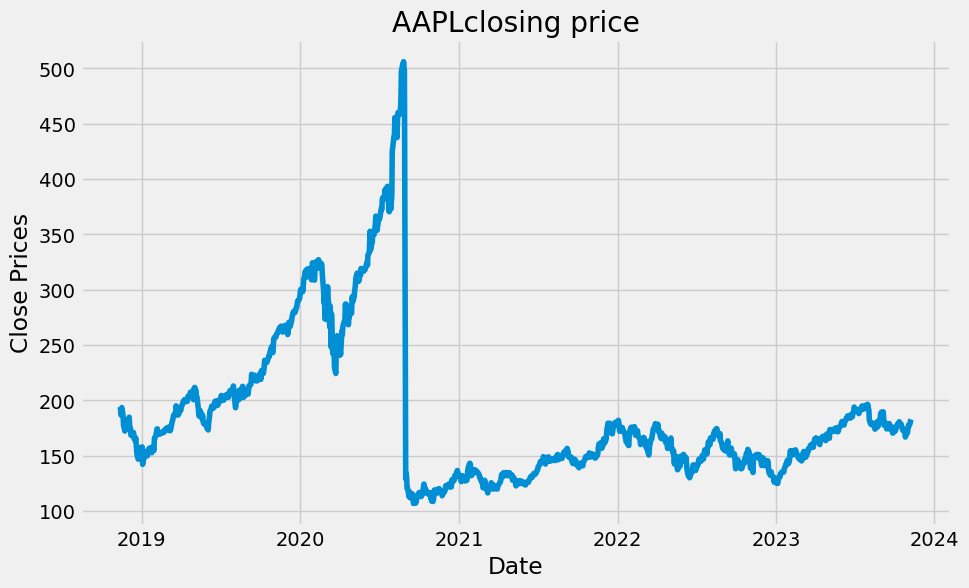

In [84]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(stock_data['Close'])
plt.title('AAPLclosing price')
plt.show()

<Axes: ylabel='Density'>

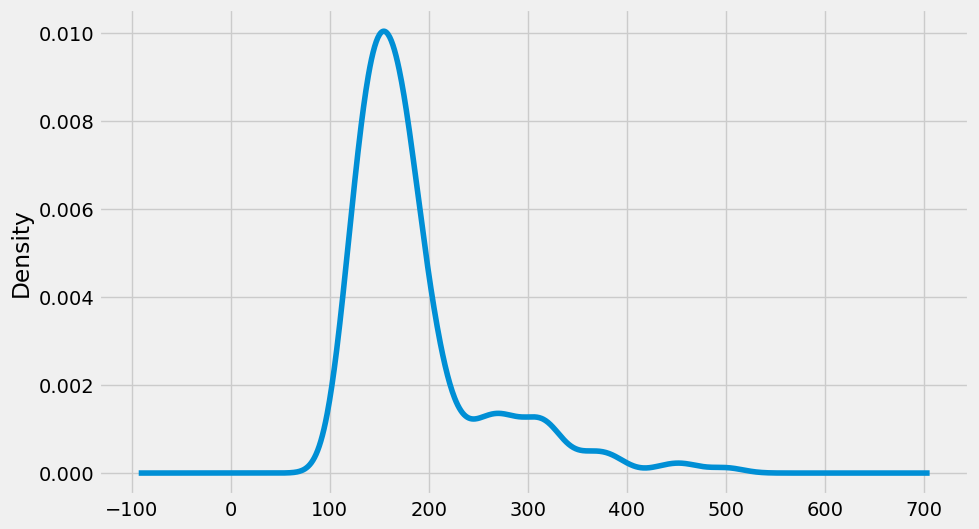

In [85]:
df_close = stock_data['Close']
df_close.plot(kind='kde')

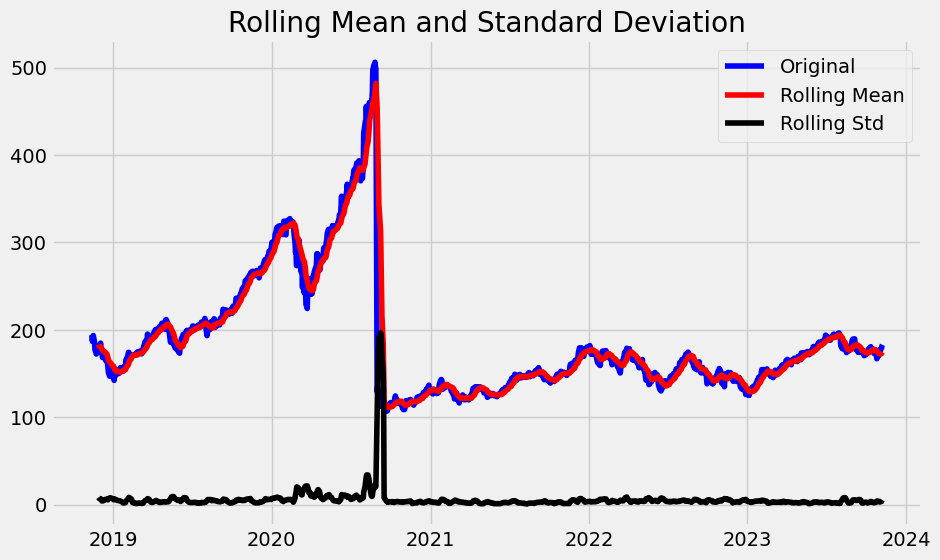

Results of dickey fuller test
Test Statistics                  -2.900723
p-value                           0.045264
No. of lags used                  0.000000
Number of observations used    1255.000000
critical value (1%)              -3.435571
critical value (5%)              -2.863846
critical value (10%)             -2.567998
dtype: float64


In [86]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_close)


<Figure size 1600x900 with 0 Axes>

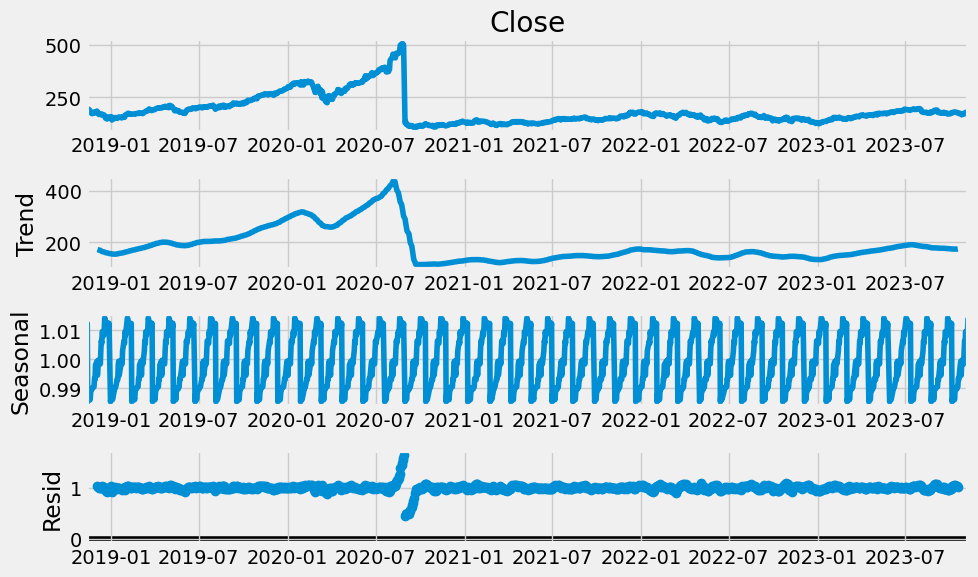

In [87]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Assuming df_close is your time series data
result = seasonal_decompose(df_close, model='multiplicative', period=30)

# Create a new Matplotlib figure
fig = plt.figure()

# Plot the seasonal decomposition results
result.plot()

# Set the size of the figure
fig.set_size_inches(16, 9)

# Show the plot
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


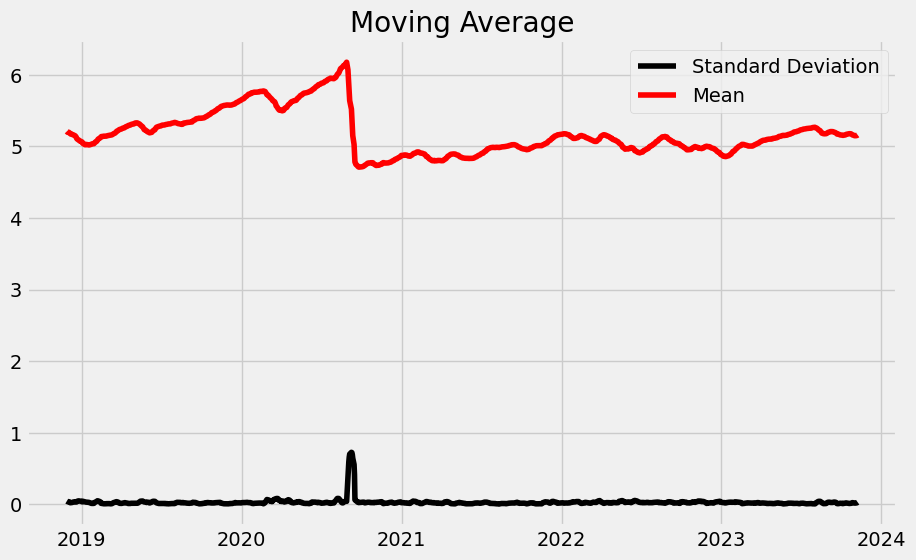

In [88]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

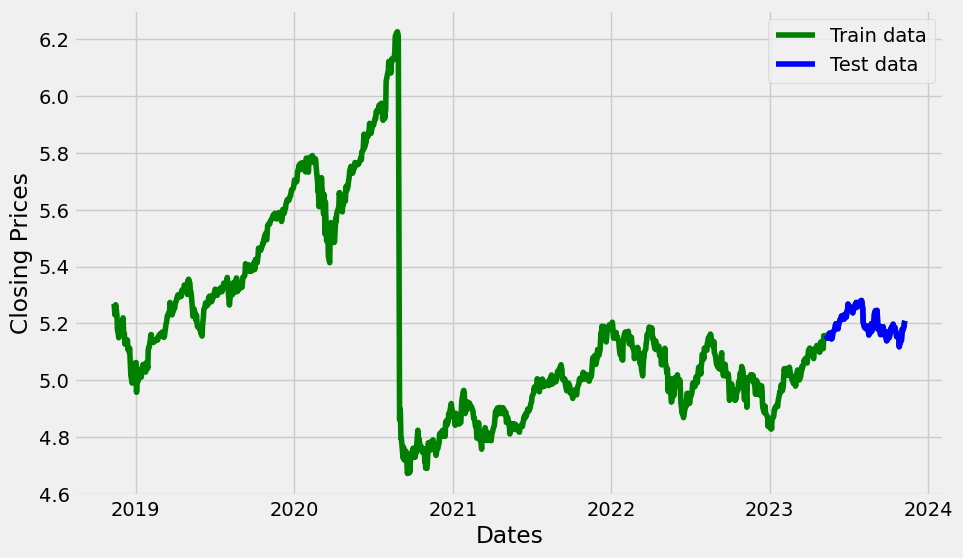

In [89]:
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3749.950, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3750.757, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3750.628, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3751.946, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3748.944, Time=0.28 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.755 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1127
Model:               SARIMAX(0, 1, 0)   Log Likelihood                1876.973
Date:                Sat, 09 Dec 2023   AIC                          -3751.946
Time:                        18:49:54   BIC                          -3746.920
Sample:                             0   HQIC                         -3750.047
                               - 1127                                  

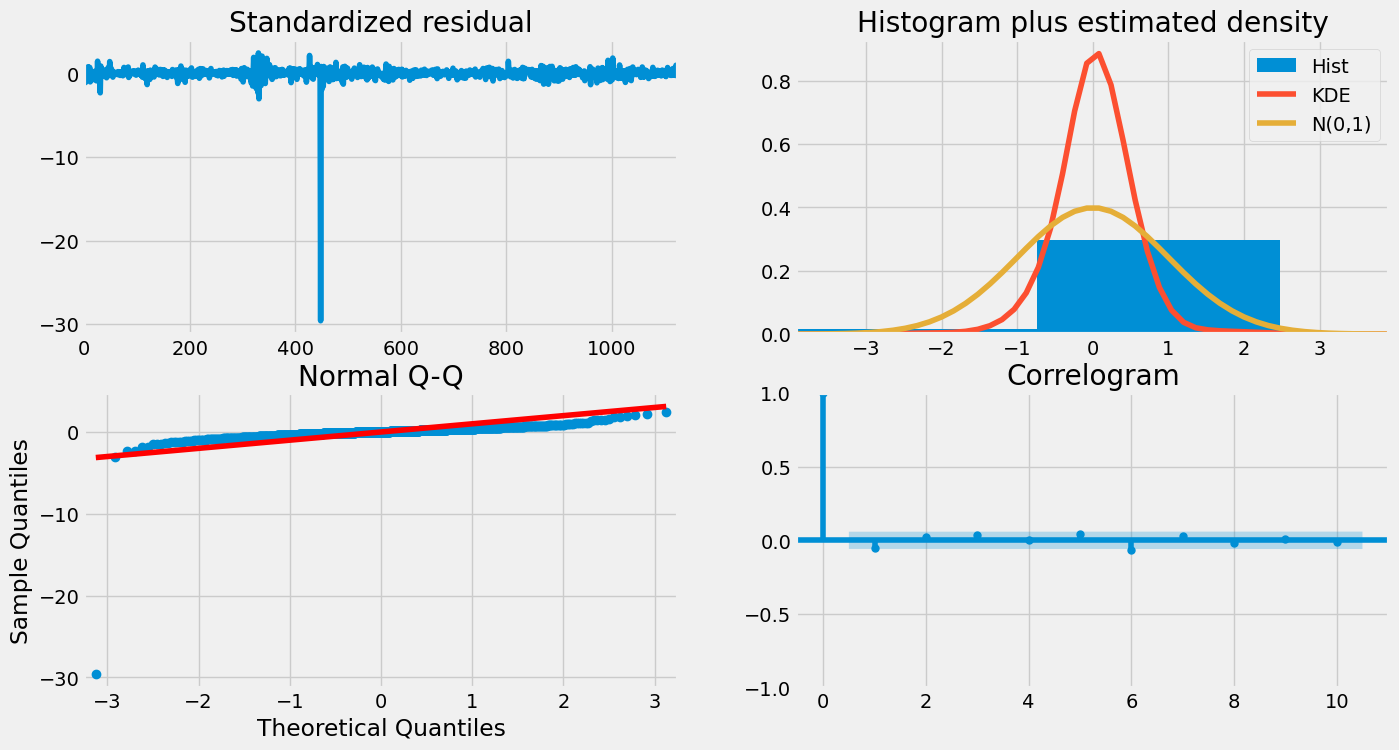

In [90]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [91]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Assuming train_data is your time series data
model = ARIMA(train_data, order=(1, 1, 2))
fitted = model.fit()
print(fitted.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1127
Model:                 ARIMA(1, 1, 2)   Log Likelihood                1879.396
Date:                Sat, 09 Dec 2023   AIC                          -3750.792
Time:                        18:49:55   BIC                          -3730.686
Sample:                             0   HQIC                         -3743.195
                               - 1127                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5951      0.604      0.986      0.324      -0.588       1.778
ma.L1         -0.6464      0.605     -1.069      0.285      -1.832       0.539
ma.L2          0.0653      0.039      1.674      0.0

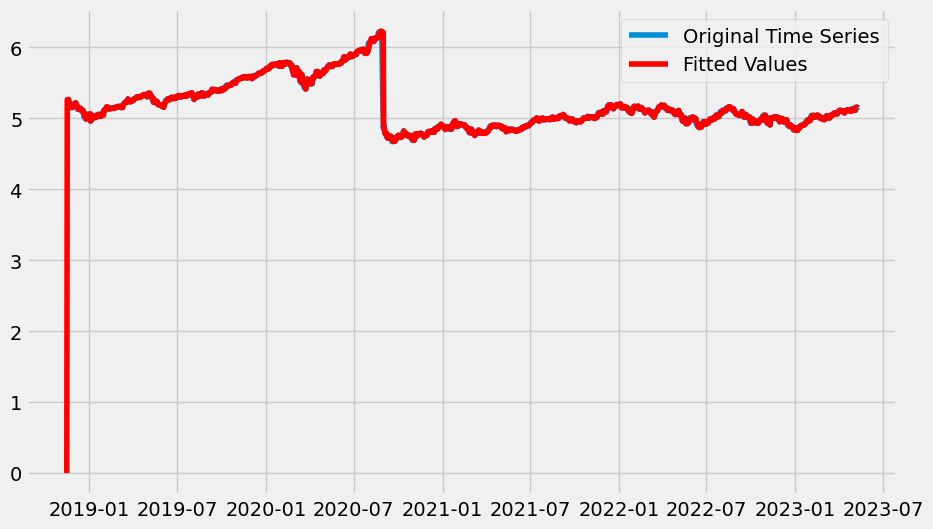

In [92]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming train_data is your time series data
model = ARIMA(train_data, order=(1, 1, 2))
fitted = model.fit()

# Plot the original time series
plt.plot(train_data, label='Original Time Series')

# Plot the fitted values
plt.plot(fitted.fittedvalues, color='red', label='Fitted Values')

plt.legend()
plt.show()


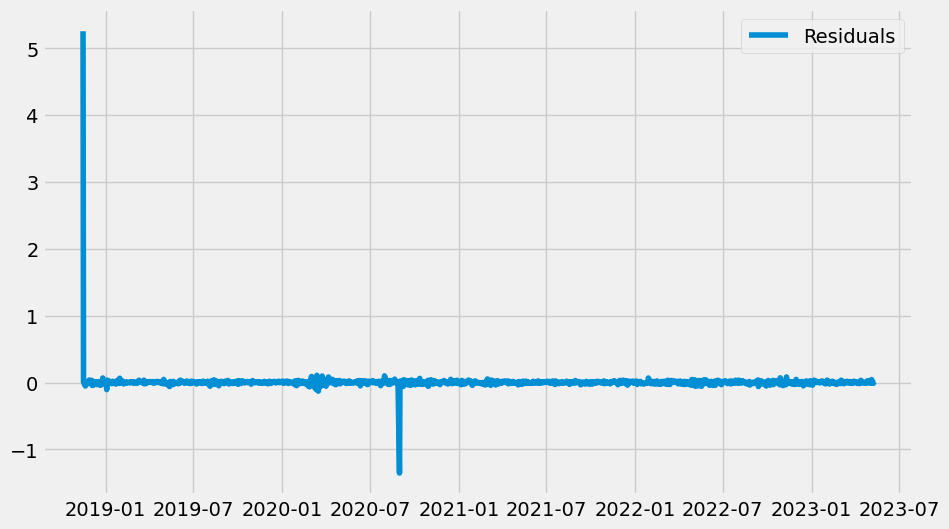

In [93]:
residuals = train_data - fitted.fittedvalues
plt.plot(residuals, label='Residuals')
plt.legend()
plt.show()


In [94]:
# Forecast
fc, se, conf = fitted.forecast(321, alpha=0.05)  # 95% conf

ValueError: too many values to unpack (expected 3)

In [ ]:
# Forecast
forecast_result = fitted.get_forecast(steps=321, alpha=0.05)

# Extract forecasted values and prediction intervals
fc = forecast_result.predicted_mean
conf = forecast_result.conf_int()


In [ ]:
se = forecast_result.se_mean


In [ ]:
# Forecast
forecast_result = fitted.get_forecast(steps=321, alpha=0.05)

# Extract forecasted values and prediction intervals
fc = forecast_result.predicted_mean
conf = forecast_result.conf_int()
se = forecast_result.se_mean


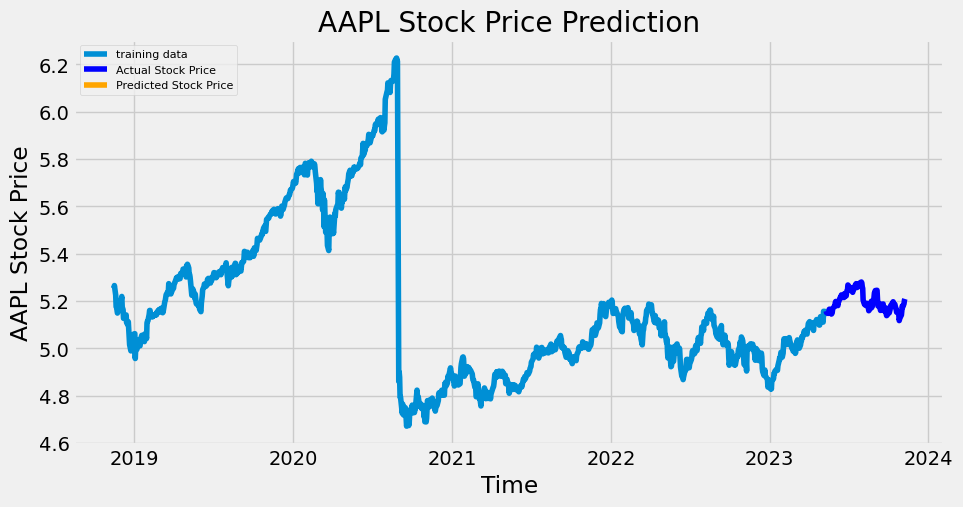

In [ ]:
# Extract forecasted values and prediction intervals
fc = forecast_result.predicted_mean
conf = forecast_result.conf_int()

# Convert index to DateTimeIndex if it's not already
test_data.index = pd.to_datetime(test_data.index)

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf.iloc[:, 0], index=test_data.index)
upper_series = pd.Series(conf.iloc[:, 1], index=test_data.index)

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color='blue', label='Actual Stock Price')
plt.plot(fc_series, color='orange', label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AAPL Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()
